# Henry Gu - Machine Learning - Homework 3 - Random Forest and Decision Trees

## Dataset
The dataset you will be using in the following parts is "Wine". 

Features: <br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>

Target:<br>
12 - quality ('good' and 'bad')<br>

Prediction task is to determine whether the quality is good. (If you transfrom the target as binary values, please make sure "good" is 1, "bad" is 0)

## Load relevant packages and data

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

# Load your training data set and test data
wine_df = pd.read_csv('wine.csv')
train_df, test_df = train_test_split(wine_df, test_size=0.15, shuffle=True, random_state=11)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [3]:
# Split data into X and y
X = train_df.drop('quality', axis=1)
y = train_df['quality']

X_test = test_df.drop('quality', axis=1)
y_test = test_df['quality']

## Data Exploration

### Skewness of data

Plot a histogram of X to understand the distributions of the continuous values

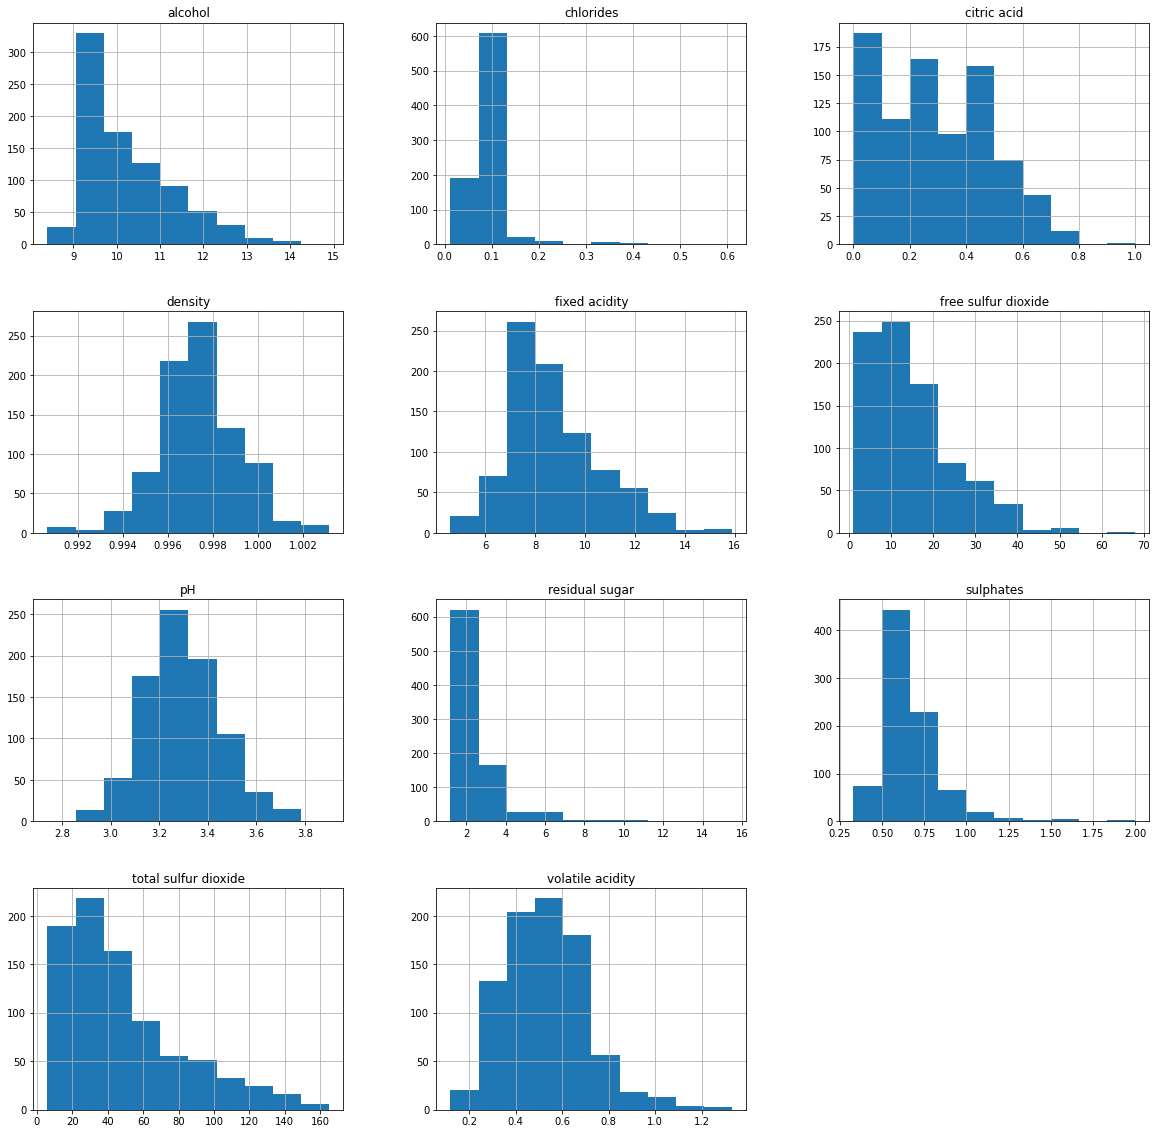

In [4]:
X.hist(figsize=(20,20));

## Data Processing

Perform transformations on the skewed features so that the distribution of these features becomes closer to a normal distribution.

In [5]:
# transform the skewed features in X
X = X.apply(lambda x: np.log(x) if (x.name == 'chlorides' or x.name == 'fixed acidity' \
                                    or x.name == 'free sulfur dioxide' or x.name == 'total sulfur dioxide' \
                                    or x.name == 'alcohol' or x.name == 'sulphates' \
                                    or x.name == 'residual sugar') else x)
X = X.apply(lambda x: np.sqrt(x) if (x.name == 'citric acid') else x)
X = X.apply(lambda x: np.cbrt(x) if (x.name == 'volatile acidity') else x)

# transform the features in X_test using the same methods applied to X
X_test = X_test.apply(lambda x: np.log(x) if (x.name == 'chlorides' or x.name == 'fixed acidity' \
                                    or x.name == 'free sulfur dioxide' or x.name == 'total sulfur dioxide' \
                                    or x.name == 'alcohol' or x.name == 'sulphates' \
                                    or x.name == 'residual sugar') else x)
X_test = X_test.apply(lambda x: np.sqrt(x) if (x.name == 'citric acid') else x)
X_test = X_test.apply(lambda x: np.cbrt(x) if (x.name == 'volatile acidity') else x)

Plot the histogram of the transformed X

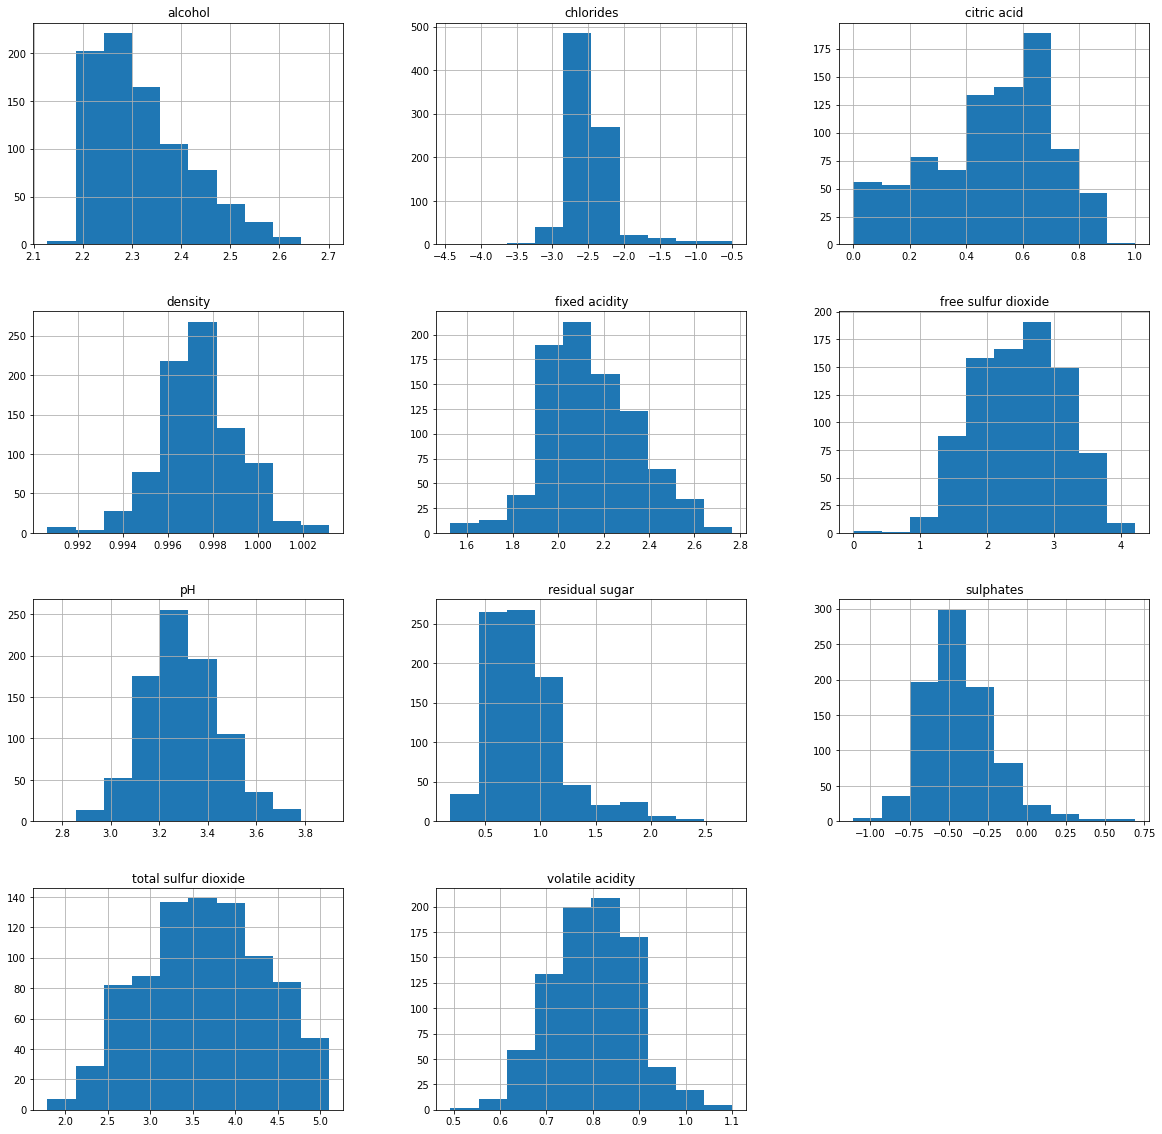

In [6]:
X.hist(figsize=(20,20));

### Standardize the transformed X

In [7]:
from sklearn.preprocessing import StandardScaler
# standardize the transformed X
X_scaler = StandardScaler()
X = pd.DataFrame(X_scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.570838,-0.180727,0.291233,0.451561,-0.554584,-1.689299,-1.333300,-0.237788,-0.501312,-0.720205,0.103165
1,-0.257939,1.539498,-0.002220,-0.394730,-0.022218,-1.352322,-1.538258,-0.086084,0.447861,0.730036,0.499378
2,1.631136,0.331857,0.950860,0.233553,-0.092581,-1.076991,-0.248096,1.824255,-1.134094,0.785651,0.499378
3,-1.414767,0.937277,-2.151822,-1.104171,-1.258759,-0.844203,-1.652900,-3.221287,1.080643,-0.879858,2.443884
4,-0.836353,0.542375,-0.910749,1.500813,-0.092581,1.137378,1.494101,-0.529957,-0.311478,-1.045653,-0.847690
...,...,...,...,...,...,...,...,...,...,...,...
845,-0.443276,-0.493750,0.330324,0.451561,-0.164682,1.302284,0.603680,0.026289,0.068192,-0.067004,0.103165
846,0.036211,-0.120764,0.170013,-0.689152,0.765180,0.741172,1.824271,-0.086084,-2.336380,4.734988,-0.308744
847,-1.570680,-0.365771,-0.189513,-1.194694,-0.596598,-2.123738,-1.333300,-0.872694,0.700973,-0.642543,-1.071341
848,-0.635883,-0.832082,0.888174,0.233553,-0.432051,0.885103,1.134153,-0.086084,0.131470,0.319236,-0.628749


In [8]:
# use the trained standardscaler on X_test
X_test = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.492105,-0.762140,-0.396680,-1.587511,-0.164682,-0.161644,-0.721088,-1.041254,0.258026,-0.642543,-0.958914
1,1.463228,-1.319633,1.072580,-0.394730,-0.022218,-1.352322,-1.333300,0.756712,-2.019989,0.319236,-1.071341
2,0.313734,-1.610521,0.888174,-0.848204,-0.682484,1.137378,0.271680,-0.367016,0.131470,2.025600,0.401731
3,0.524985,0.222889,1.412889,-0.127113,4.438287,-0.030245,-0.040157,0.475780,-0.817703,0.130441,-0.628749
4,-0.257939,1.725512,-2.151822,-0.257879,-0.022218,-0.305575,-0.293568,-0.445677,-0.311478,-1.131005,-0.414322
...,...,...,...,...,...,...,...,...,...,...,...
145,0.092984,1.602238,-2.151822,-1.587511,-0.770974,1.016502,-0.204023,-1.097440,-0.184921,-0.720205,-0.520983
146,1.016480,0.438306,0.919677,-0.394730,-0.554584,0.202544,0.302482,0.981458,0.004913,-0.642543,-0.628749
147,-1.117049,0.937277,-2.151822,2.490633,1.114991,0.814852,0.603680,1.318577,1.017364,0.440656,0.001707
148,1.463228,-2.605373,0.981734,1.500813,0.601403,-1.689299,-0.721088,1.262390,-0.121643,1.725270,-0.100750


### Convert y to labels

In [9]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y) # convert y categories to binary values
y_test = LabelEncoder().fit_transform(y_test) # convert y_train categories to binary values

Splitting training data into training and validation set (the code has been provided)

In [10]:
X_train = X.iloc[:700,:]
y_train = y[:700]
X_val = X.iloc[700:,:]
y_val = y[700:]

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(700, 11)
(150, 11)
(150, 11)


In [12]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(700,)
(150,)
(150,)


## Build helper functions

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


def print_results(y_true, y_pred):
    print(f"{'Accuracy:':<10} {accuracy_score(y_true, y_pred) * 100:>5.2f}%")
    print(f"{'Precision:':<10} {precision_score(y_true, y_pred) * 100:>5.2f}%")
    print(f"{'Recall:':<10} {recall_score(y_true, y_pred) * 100:>5.2f}%")

## Build Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(random_state=20)
DTClassifier.fit(X_train,y_train)

print('Training Data Results:')
print_results(y_train, DTClassifier.predict(X_train))
print()

print('Validation Data Results:')
print_results(y_val, DTClassifier.predict(X_val))
print()

print('Test Data Results:')
print_results(y_test, DTClassifier.predict(X_test))

Training Data Results:
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%

Validation Data Results:
Accuracy:  66.67%
Precision: 64.86%
Recall:    66.67%

Test Data Results:
Accuracy:  76.00%
Precision: 73.13%
Recall:    73.13%


Plot ROC curve and obtain AUC for validation predictions

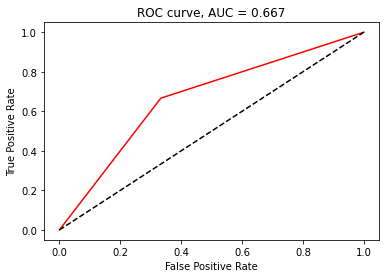

In [56]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val, DTClassifier.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

## Build Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators = 100, random_state=20)
RFClassifier.fit(X_train, y_train)

print('Training Data Results:')
print_results(y_train, RFClassifier.predict(X_train))
print()

print('Validation Data Results:')
print_results(y_val, RFClassifier.predict(X_val))
print()

print('Test Data Results:')
print_results(y_test, RFClassifier.predict(X_test))

Training Data Results:
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%

Validation Data Results:
Accuracy:  77.33%
Precision: 75.00%
Recall:    79.17%

Test Data Results:
Accuracy:  83.33%
Precision: 80.00%
Recall:    83.58%


Plot ROC curve and obtain AUC for the validation predictions

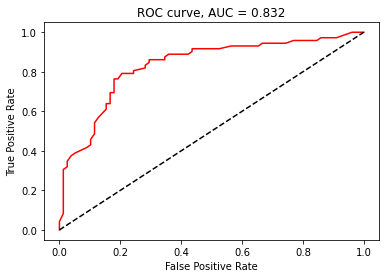

In [17]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val, RFClassifier.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

## Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Initialize the values for each parameter which should be tested

param_grid = {
    'max_depth': [None, 10],
    'max_features': ['auto', 5],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 10],
    'n_estimators': [10, 100]
}

In [86]:
rf = RandomForestClassifier(random_state=20)

In [87]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2) 

In [88]:
# Fit the training data
GSClassifier = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.0s finished


In [89]:
# Print the best parameters
GSClassifier.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [90]:
# Print the best score
GSClassifier.best_score_

0.8033406812575448

In [91]:
# Calculate metrics using the best model

print('Training Data Results:')
print_results(y_train, GSClassifier.predict(X_train))
print()

print('Validation Data Results:')
print_results(y_val, GSClassifier.predict(X_val))
print()

print('Test Data Results:')
print_results(y_test, GSClassifier.predict(X_test))

Training Data Results:
Accuracy:  98.00%
Precision: 97.50%
Recall:    98.60%

Validation Data Results:
Accuracy:  76.00%
Precision: 72.50%
Recall:    80.56%

Test Data Results:
Accuracy:  80.00%
Precision: 74.67%
Recall:    83.58%


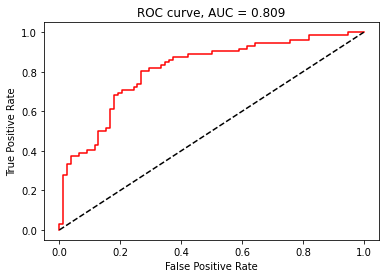

In [92]:
# Using the best model, plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

# compute the roc curve
fpr, tpr, thresholds = roc_curve(y_val, GSClassifier.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure()
title = f'ROC curve, AUC = {roc_auc:.3f}'
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.show()

### Final Model
Calculate metrics for the best model given the hyperparameter testing above.

In [93]:
final_model = RandomForestClassifier(random_state=20, \
                                 max_depth=10, \
                                 max_features=5, \
                                 min_samples_leaf=2, \
                                 min_samples_split=5, \
                                 n_estimators=100).fit(X,y)

print('Results:')
print_results(y_test, final_model.predict(X_test))

Results:
Accuracy:  81.33%
Precision: 77.46%
Recall:    82.09%
